<table>
    <tr><td>
         <a href="https://nbviewer.jupyter.org/github/panayiotiska/Jupyter-Sentiment-Analysis-Video-games-reviews/blob/master/SVM_HashingVectorizer_Under_Sampling_TomekLinks-Regex.ipynb">
         <img alt="start" src="figures/button_previous.jpg" width= 70% height= 70%>
    </td><td>
        <a href="https://nbviewer.jupyter.org/github/panayiotiska/Jupyter-Sentiment-Analysis-Video-games-reviews/blob/master/Index.ipynb">
         <img alt="start" src="figures/button_table-of-contents.jpg" width= 70% height= 70%>
    </td><td>
         <a href="https://nbviewer.jupyter.org/github/panayiotiska/Jupyter-Sentiment-Analysis-Video-games-reviews/blob/master/References.ipynb">
         <img alt="start" src="figures/button_next.jpg" width= 70% height= 70%>
    </td></tr>
</table>

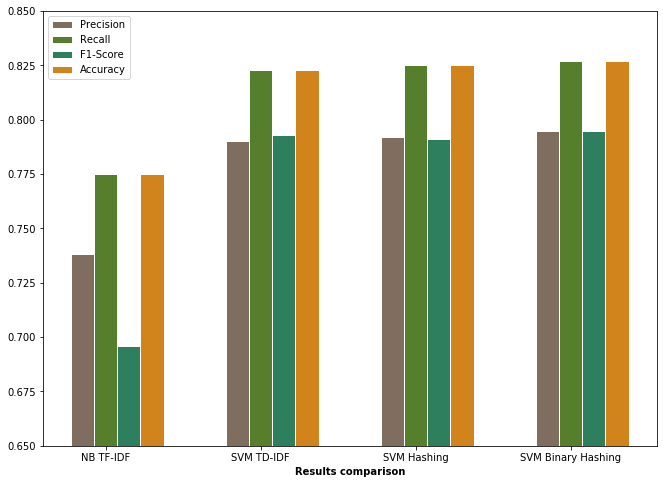

In [61]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
data1 = pd.read_csv(r"reports\NB_report_TFIDFVect.csv").set_index('Unnamed: 0')
data2 = pd.read_csv(r"reports\SVM_report_TFIDFVect.csv").set_index('Unnamed: 0')
data3 = pd.read_csv(r"reports\SVM_report_HashingVect.csv").set_index('Unnamed: 0')
data4 = pd.read_csv(r"reports\SVM_report_HashingVect_Binary.csv").set_index('Unnamed: 0')

# Set width of bar
barWidth = 0.15
 
# Set height of bar
bars1 = [data1['precision']['weighted avg'], data2['precision']['weighted avg'], data3['precision']['weighted avg'], data4['precision']['weighted avg']]
bars2 = [data1['recall']['weighted avg'], data2['recall']['weighted avg'], data3['recall']['weighted avg'], data4['recall']['weighted avg']]
bars3 = [data1['f1-score']['weighted avg'], data2['f1-score']['weighted avg'], data3['f1-score']['weighted avg'], data4['f1-score']['weighted avg']]
bars4 = [data1['recall']['accuracy'], data2['recall']['accuracy'], data3['recall']['accuracy'], data4['recall']['accuracy']]
bars5 = bars1 + bars2 + bars3 + bars4

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = r1 + r2 + r3 + r4

 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='F1-Score')
plt.bar(r4, bars4, color='#D2841C', width=barWidth, edgecolor='white', label='Accuracy')
 
# Add xticks on the middle of the group bars
plt.xlabel('Results comparison', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['NB TF-IDF', 'SVM TD-IDF', 'SVM Hashing', 'SVM Binary Hashing'])
 
# Create legend & Show graphic
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.legend()
plt.ylim(0.65,0.85)

plt.show()

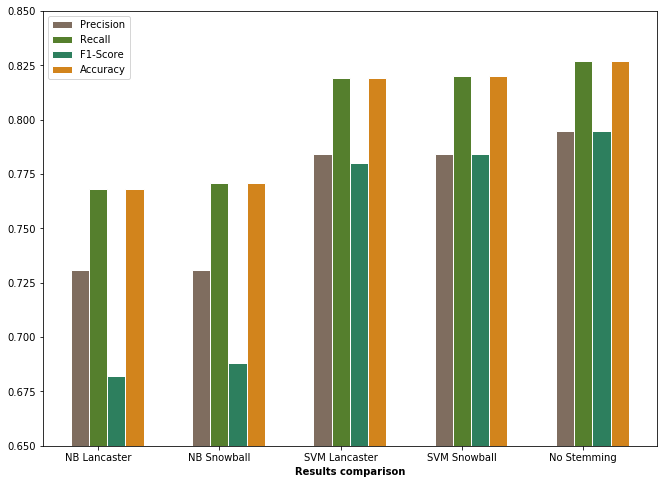

In [63]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
data1 = pd.read_csv(r"reports\NB_report_TFIDFVect_LancasterStemmer.csv").set_index('Unnamed: 0')
data2 = pd.read_csv(r"reports\NB_report_TFIDFVect_SnowballStemmer.csv").set_index('Unnamed: 0')
data3 = pd.read_csv(r"reports\SVM_report_HashingVect_LancasterStemming.csv").set_index('Unnamed: 0')
data4 = pd.read_csv(r"reports\SVM_report_HashingVect_SnowballStemming.csv").set_index('Unnamed: 0')
data5 = pd.read_csv(r"reports\SVM_report_HashingVect_Binary.csv").set_index('Unnamed: 0')

# Set width of bar
barWidth = 0.15
 
# Set height of bar
bars1 = [data1['precision']['weighted avg'], data2['precision']['weighted avg'], data3['precision']['weighted avg'], data4['precision']['weighted avg'], data5['precision']['weighted avg']]
bars2 = [data1['recall']['weighted avg'], data2['recall']['weighted avg'], data3['recall']['weighted avg'], data4['recall']['weighted avg'], data5['recall']['weighted avg']]
bars3 = [data1['f1-score']['weighted avg'], data2['f1-score']['weighted avg'], data3['f1-score']['weighted avg'], data4['f1-score']['weighted avg'], data5['f1-score']['weighted avg']]
bars4 = [data1['recall']['accuracy'], data2['recall']['accuracy'], data3['recall']['accuracy'], data4['recall']['accuracy'], data5['recall']['accuracy']]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='F1-Score')
plt.bar(r4, bars4, color='#D2841C', width=barWidth, edgecolor='white', label='Accuracy')
 
# Add xticks on the middle of the group bars
plt.xlabel('Results comparison', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['NB Lancaster', 'NB Snowball', 'SVM Lancaster', 'SVM Snowball', 'No Stemming'])
 
# Create legend & Show graphic
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.legend()
plt.ylim(0.65,0.85)

plt.show()

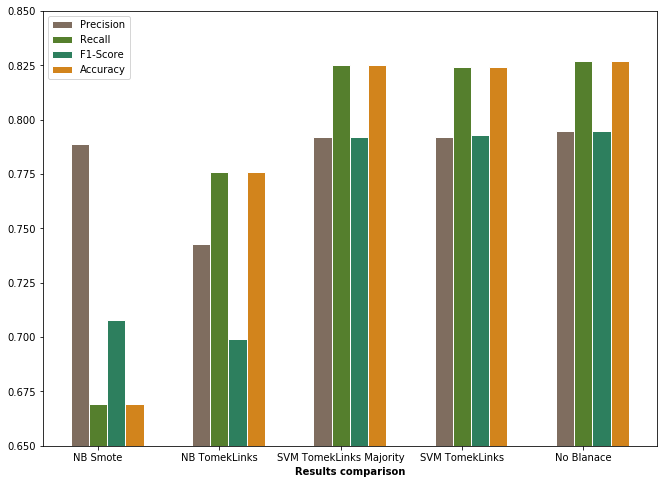

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
data1 = pd.read_csv(r"reports\NB_report_TFIDFVect_Smote.csv").set_index('Unnamed: 0')
data2 = pd.read_csv(r"reports\NB_report_TFIDFVect_TomeLinks.csv").set_index('Unnamed: 0')
data3 = pd.read_csv(r"reports\SVM_report_HashingVect_TomeLinks_Majority.csv").set_index('Unnamed: 0')
data4 = pd.read_csv(r"reports\SVM_report_HashingVect_TomekLinks.csv").set_index('Unnamed: 0')
data5 = pd.read_csv(r"reports\SVM_report_HashingVect_Binary.csv").set_index('Unnamed: 0')

# Set width of bar
barWidth = 0.15

# Set height of bar
bars1 = [data1['precision']['weighted avg'], data2['precision']['weighted avg'], data3['precision']['weighted avg'], data4['precision']['weighted avg'], data5['precision']['weighted avg']]
bars2 = [data1['recall']['weighted avg'], data2['recall']['weighted avg'], data3['recall']['weighted avg'], data4['recall']['weighted avg'], data5['recall']['weighted avg']]
bars3 = [data1['f1-score']['weighted avg'], data2['f1-score']['weighted avg'], data3['f1-score']['weighted avg'], data4['f1-score']['weighted avg'], data5['f1-score']['weighted avg']]
bars4 = [data1['recall']['accuracy'], data2['recall']['accuracy'], data3['recall']['accuracy'], data4['recall']['accuracy'], data5['recall']['accuracy']]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='F1-Score')
plt.bar(r4, bars4, color='#D2841C', width=barWidth, edgecolor='white', label='Accuracy')
 
# Add xticks on the middle of the group bars
plt.xlabel('Results comparison', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['NB Smote', 'NB TomekLinks', 'SVM TomekLinks Majority', 'SVM TomekLinks', 'No Blanace'])
 
# Create legend & Show graphic
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.legend()
plt.ylim(0.65,0.85)

plt.show()

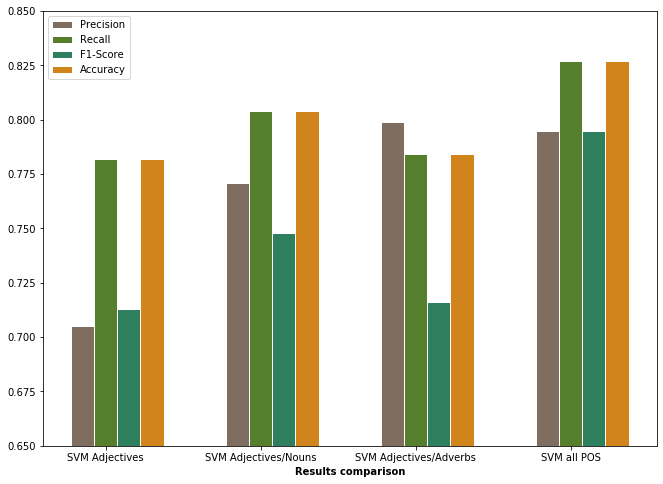

In [66]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
data1 = pd.read_csv(r"reports\SVM_report_HashingVect_Adjectives.csv").set_index('Unnamed: 0')
data2 = pd.read_csv(r"reports\SVM_report_HashingVect_Adjectives_Nouns.csv").set_index('Unnamed: 0')
data3 = pd.read_csv(r"reports\SVM_report_HashingVect_Adjectives_Adverbs.csv").set_index('Unnamed: 0')
data4 = pd.read_csv(r"reports\SVM_report_HashingVect_Binary.csv").set_index('Unnamed: 0')

# Set width of bar
barWidth = 0.15
 
# Set height of bar
bars1 = [data1['precision']['weighted avg'], data2['precision']['weighted avg'], data3['precision']['weighted avg'], data4['precision']['weighted avg']]
bars2 = [data1['recall']['weighted avg'], data2['recall']['weighted avg'], data3['recall']['weighted avg'], data4['recall']['weighted avg']]
bars3 = [data1['f1-score']['weighted avg'], data2['f1-score']['weighted avg'], data3['f1-score']['weighted avg'], data4['f1-score']['weighted avg']]
bars4 = [data1['recall']['accuracy'], data2['recall']['accuracy'], data3['recall']['accuracy'], data4['recall']['accuracy']]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='F1-Score')
plt.bar(r4, bars4, color='#D2841C', width=barWidth, edgecolor='white', label='Accuracy')
 
# Add xticks on the middle of the group bars
plt.xlabel('Results comparison', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['SVM Adjectives', 'SVM Adjectives/Nouns', 'SVM Adjectives/Adverbs', 'SVM all POS'])
 
# Create legend & Show graphic
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.legend()
plt.ylim(0.65,0.85)

plt.show()

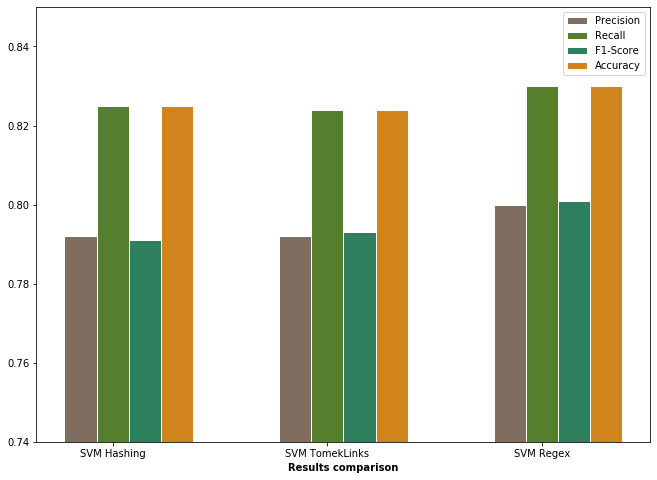

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
data1 = pd.read_csv(r"reports\SVM_report_HashingVect.csv").set_index('Unnamed: 0')
data3 = pd.read_csv(r"reports\SVM_report_HashingVect_TomekLinks.csv").set_index('Unnamed: 0')
data5 = pd.read_csv(r"reports\SVM_report_HashingVect_Regex.csv").set_index('Unnamed: 0')

# Set width of bar
barWidth = 0.15
 
# Set height of bar
bars1 = [data1['precision']['weighted avg'], data3['precision']['weighted avg'], data5['precision']['weighted avg']]
bars2 = [data1['recall']['weighted avg'], data3['recall']['weighted avg'], data5['recall']['weighted avg']]
bars3 = [data1['f1-score']['weighted avg'], data3['f1-score']['weighted avg'], data5['f1-score']['weighted avg']]
bars4 = [data1['recall']['accuracy'], data3['recall']['accuracy'], data5['recall']['accuracy']]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='F1-Score')
plt.bar(r4, bars4, color='#D2841C', width=barWidth, edgecolor='white', label='Accuracy')
 
# Add xticks on the middle of the group bars
plt.xlabel('Results comparison', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['SVM Hashing', 'SVM TomekLinks', 'SVM Regex'])
 
# Create legend & Show graphic
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.legend()
plt.ylim(0.74,0.85)

plt.show()

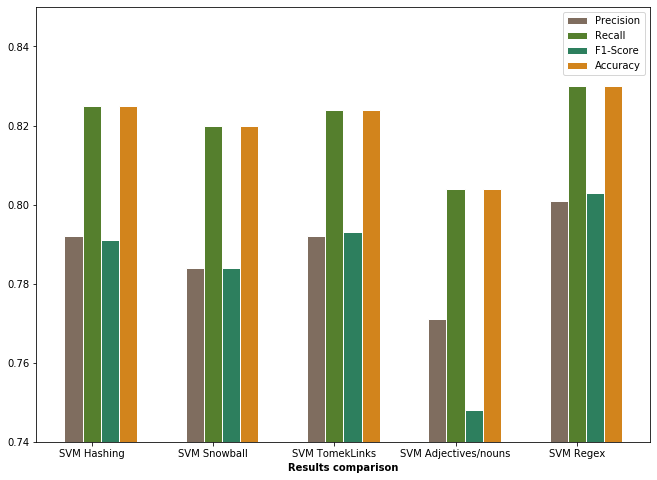

In [8]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
data1 = pd.read_csv(r"reports\SVM_report_HashingVect.csv").set_index('Unnamed: 0')
data2 = pd.read_csv(r"reports\SVM_report_HashingVect_SnowballStemming.csv").set_index('Unnamed: 0')
data3 = pd.read_csv(r"reports\SVM_report_HashingVect_TomekLinks.csv").set_index('Unnamed: 0')
data4 = pd.read_csv(r"reports\SVM_report_HashingVect_Adjectives_Nouns.csv").set_index('Unnamed: 0')
data5 = pd.read_csv(r"reports\SVM_report_HashingVect_Binary_TomekLinks_Regex.csv").set_index('Unnamed: 0')

# Set width of bar
barWidth = 0.15
 
# Set height of bar
bars1 = [data1['precision']['weighted avg'], data2['precision']['weighted avg'], data3['precision']['weighted avg'], data4['precision']['weighted avg'], data5['precision']['weighted avg']]
bars2 = [data1['recall']['weighted avg'], data2['recall']['weighted avg'], data3['recall']['weighted avg'], data4['recall']['weighted avg'], data5['recall']['weighted avg']]
bars3 = [data1['f1-score']['weighted avg'], data2['f1-score']['weighted avg'], data3['f1-score']['weighted avg'], data4['f1-score']['weighted avg'], data5['f1-score']['weighted avg']]
bars4 = [data1['recall']['accuracy'], data2['recall']['accuracy'], data3['recall']['accuracy'], data4['recall']['accuracy'], data5['recall']['accuracy']]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='F1-Score')
plt.bar(r4, bars4, color='#D2841C', width=barWidth, edgecolor='white', label='Accuracy')
 
# Add xticks on the middle of the group bars
plt.xlabel('Results comparison', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['SVM Hashing', 'SVM Snowball', 'SVM TomekLinks', 'SVM Adjectives/nouns', 'SVM Regex'])
 
# Create legend & Show graphic
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.legend()
plt.ylim(0.74,0.85)
plt.show()


In [13]:
import matplotlib.pyplot as plt
import numpy as np

#https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report

def show_values(pc, fmt="%.2f", **kw):
    
    pc.update_scalarmappable()
    ax = pc.axes
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):

    # Plot it out
    fig, ax = plt.subplots()
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1line.set_visible = False
        t.tick2line.set_visible = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1line.set_visible = False
        t.tick2line.set_visible = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):

    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(float(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    #print('plotMat: {0}'.format(plotMat))
    #print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)

[0.697, 0.608, 0.649]
[0.521, 0.189, 0.277]
[0.863, 0.971, 0.914]


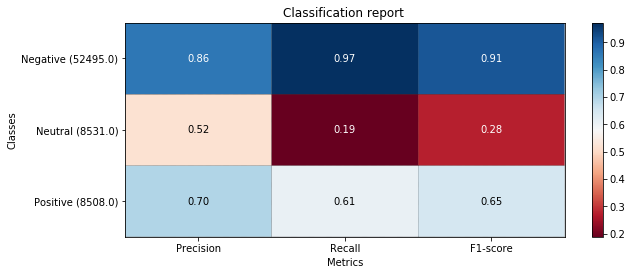

In [14]:
import pandas as pd
    
data_df = pd.read_csv(r'reports\SVM_report_HashingVect_Binary_TomekLinks_Regex.csv', dtype='str')
data_df = data_df[:-1]
data_df = data_df.set_index(data_df.columns[0])
sampleClassificationReport = data_df.to_string()
plot_classification_report(sampleClassificationReport)

#plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
plt.show()

<a href="https://nbviewer.jupyter.org/github/panayiotiska/Jupyter-Sentiment-Analysis-Video-games-reviews/blob/master/References.ipynb">
         <img alt="start" src="figures/button_next.jpg">